In [32]:
import obspy
from matplotlib import pyplot as plt

<h1 style="text-align:center">Trabajo Grupal 3</h1>
<h3 style="text-align:center">ACUS125: Análisis y aislamiento de vibraciones</h3>
<p style="text-align:center">Benjamín Bravo <br>
<a href="mailto:benjamin.bravo@alumnos.uach.cl">benjamin.bravo@alumnos.uach.cl</a><br>
<p style="text-align:center">Cristóbal Sandoval <br>
<a href="mailto:cristobal.sandoval02@alumnos.uach.cl">cristobal.sandoval02@alumnos.uach.cl </a><br>

# Introducción

En el presente cuadernillo, se importan datos del evento sísmico producido en 1 de septiembre del año 2020 en la zona costera de Copiapó, Chile. Los datos que se tienen pertenecen a distintas estaciones sismológicas cercanas al lugar del evento, posterior a la importación se hace una sección de gráficos para visualizar las trazas y posteriormente un pequeño análisis gráfico.

## Importación de datos

In [2]:
AC02_HHE = obspy.read('AC02\AC02_HHE.sac')
AC02_HHN = obspy.read('AC02\AC02_HHN.sac')
AC02_HHZ = obspy.read('AC02\AC02_HHZ.sac')

CO02_HHE = obspy.read('CO02\CO02_HHE.sac')
CO02_HHN = obspy.read('CO02\CO02_HHN.sac')
CO02_HHZ = obspy.read('CO02\CO02_HHZ.sac')

GO01_BHE = obspy.read('GO01\GO01_BHE.sac')
GO01_BHN = obspy.read('GO01\GO01_BHN.sac')
GO01_BHZ = obspy.read('GO01\GO01_BHZ.sac')

PB06_HHE = obspy.read('PB06\PB06_HHE.sac')
PB06_HHN = obspy.read('PB06\PB06_HHN.sac')
PB06_HHZ = obspy.read('PB06\PB06_HHZ.sac')

<p style="text-align:center">
	<img src="MAPA.png" alt="MDOF" width=50%/></a><br>
    <strong> Figura 1: Mapa geográfico de las estaciones y el epicentro</strong>
</p>

# Duración de la traza captado por cada estación:

In [28]:
horas_chile = (AC02_HHE[0].stats.endtime - AC02_HHE[0].stats.starttime)/60
horas_chile2 = (CO02_HHE[0].stats.endtime - CO02_HHE[0].stats.starttime)/60
horas_chile3 = (GO01_BHE[0].stats.endtime - GO01_BHE[0].stats.starttime)/60
horas_chile4 = (PB06_HHE[0].stats.endtime - PB06_HHE[0].stats.starttime)/60
print(f'La duración de la traza captada por la estación: \nAC02:{round(horas_chile,2)} [min] \nCO02: {round(horas_chile2,2)} [min] \nGO01: {round(horas_chile3,2)} [min] \nPB06: {round(horas_chile4,2)} [min]')

La duración de la traza captada por la estación: 
AC02:6.33 [min] 
CO02: 7.0 [min] 
GO01: 9.67 [min] 
PB06: 8.33 [min]


# Ploteo de las señales en distintos ejes para cada estación.

+ Eje Este

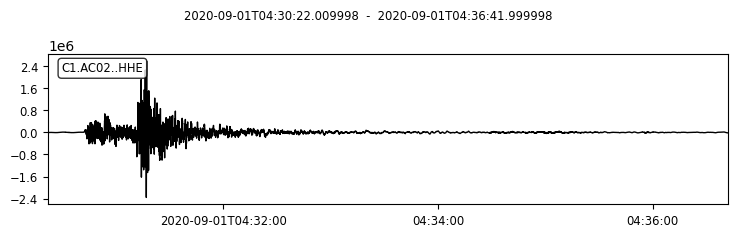

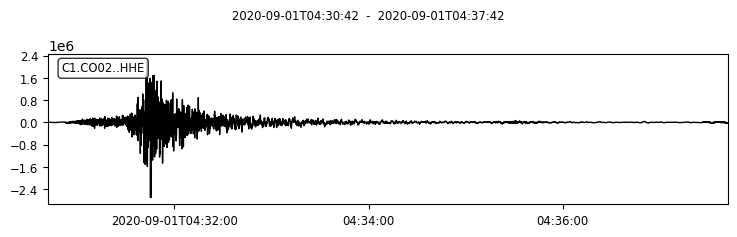

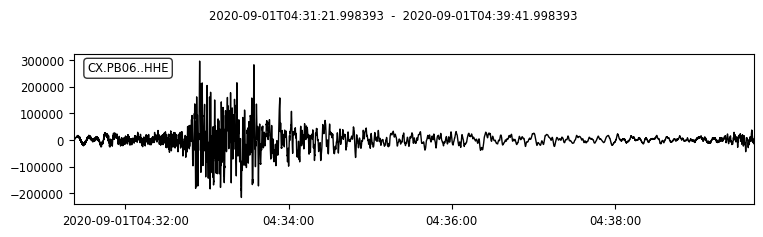

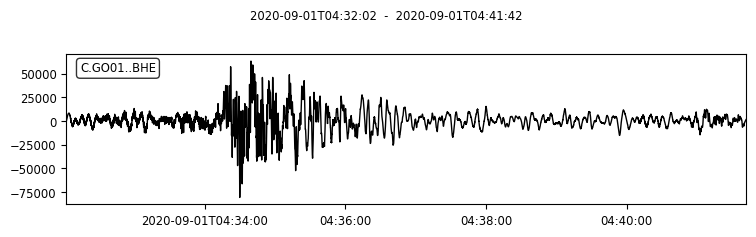

In [3]:
AC02_HHE.plot();
CO02_HHE.plot();
PB06_HHE.plot();
GO01_BHE.plot();

In [4]:
maxs = []
maxs.append(AC02_HHE.max())
maxs.append(CO02_HHE.max())
maxs.append(PB06_HHE.max())
maxs.append(GO01_BHE.max())
print(f'Amplitudes máximas por estación, [counts] en el eje Este: \nAC02:{maxs[0]} \nCO02:{maxs[1]} \nPB06:{maxs[2]} \nGO01:{maxs[3]}') 

Amplitudes máximas por estación, [counts] en el eje Este: 
AC02:[2590900.0] 
CO02:[-2702775.0] 
PB06:[295510.0] 
GO01:[-80998.0]


+ Eje Norte

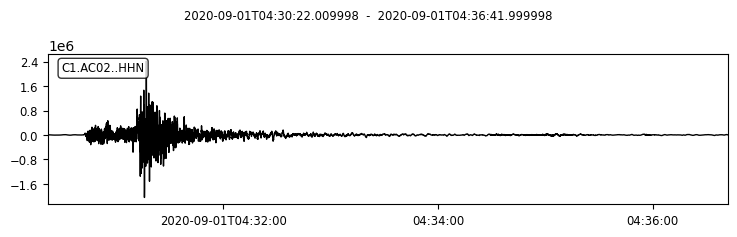

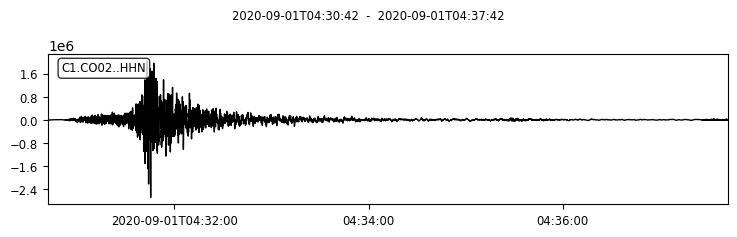

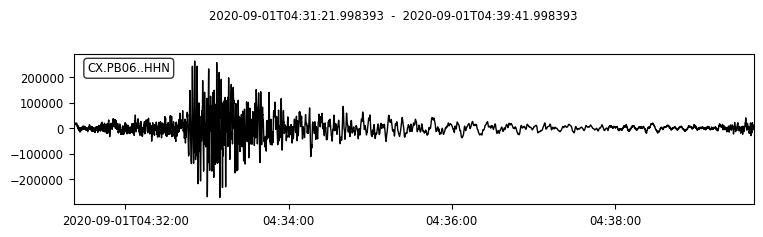

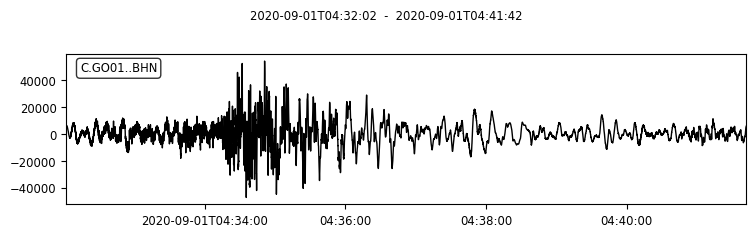

In [5]:
AC02_HHN.plot();
CO02_HHN.plot();
PB06_HHN.plot();
GO01_BHN.plot();

In [6]:
maxs = []
maxs.append(AC02_HHN.max())
maxs.append(CO02_HHN.max())
maxs.append(PB06_HHN.max())
maxs.append(GO01_BHN.max())
print(f'Amplitudes máximas por estación, [counts] en el eje Norte: \nAC02:{maxs[0]} \nCO02:{maxs[1]} \nPB06:{maxs[2]} \nGO01:{maxs[3]}') 

Amplitudes máximas por estación, [counts] en el eje Norte: 
AC02:[2418913.0] 
CO02:[-2699433.0] 
PB06:[-271850.0] 
GO01:[54318.0]


+ Eje Z

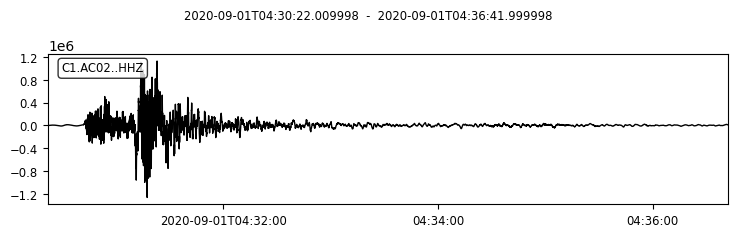

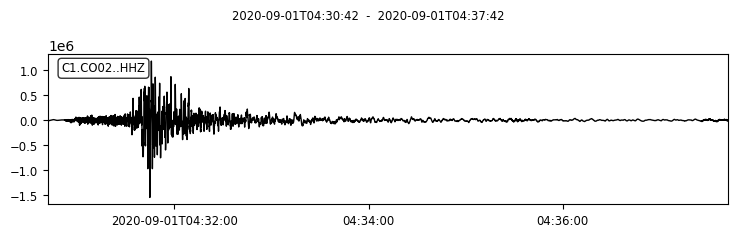

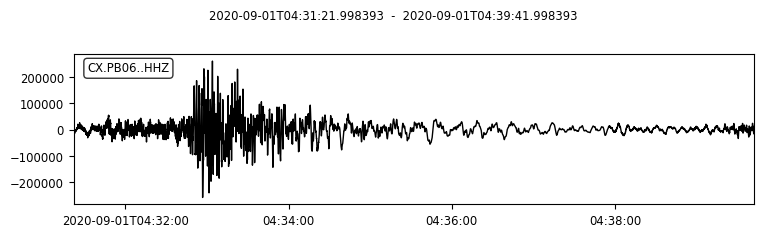

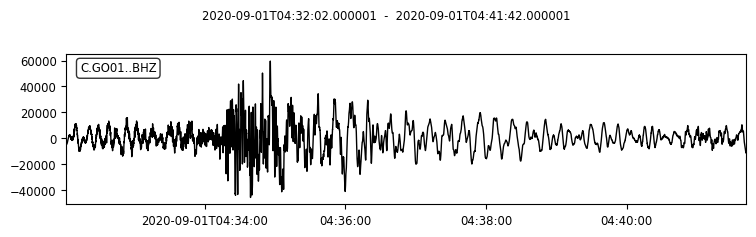

In [7]:
AC02_HHZ.plot();
CO02_HHZ.plot();
PB06_HHZ.plot();
GO01_BHZ.plot();

In [8]:
maxs = []
maxs.append(AC02_HHZ.max())
maxs.append(CO02_HHZ.max())
maxs.append(PB06_HHZ.max())
maxs.append(GO01_BHZ.max())
print(f'Amplitudes máximas por estación, [counts] en el eje Z: \nAC02:{maxs[0]} \nCO02:{maxs[1]} \nPB06:{maxs[2]} \nGO01:{maxs[3]}') 

Amplitudes máximas por estación, [counts] en el eje Z: 
AC02:[-1263614.0] 
CO02:[-1545870.0] 
PB06:[260705.0] 
GO01:[59576.0]


# Espectrograma del evento

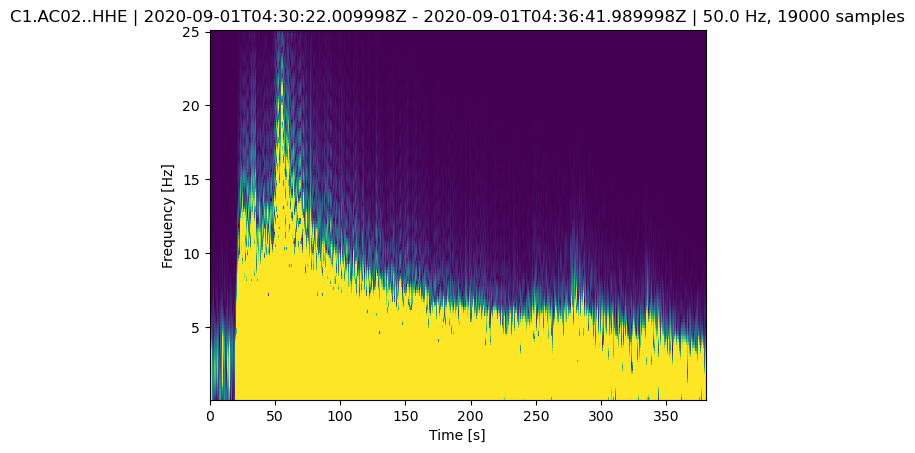

In [65]:
st_filtrado = AC02_HHE.copy()
st_filtrado.detrend(type = 'demean')
st_filtrado.detrend(type = 'linear')
st_filtrado.filter('highpass', freq = 1) 
st_filtrado.filter('lowpass', freq = 3)   
st_filtrado.decimate(2)
fs = st_filtrado[0].stats.sampling_rate

fig = st_filtrado[0].spectrogram(show=False)
ax  = fig.axes[0]
im  = ax.images[0]
im.set_clim(vmax = 100)
plt.show();

# Conclusiones

Luego de graficar cada evento medido en distintas estaciones respecto a los ejes X, Y y Z; es posible observar diferencias que tienen coherencias de acuerdo a la posición geográfica de cada estación. Por ejemplo en la estación GO01 que físicamente se encuentra a mayor distancia respecto al epicentro, en todos los ejes se miden amplitudes considerablemente menores debido a la atenuación por distancia y que además de esto, la onda P llega desfasada en el tiempo en cada estación.

Respecto al análisis en el dominio de la frecuencia, es posible ver que cercano a los 70 [s] de comenzada la traza se produce un aumento en la frecuencia con la que oscila el evento, llegando a una frecuencia máxima de aproximadamente 25 [Hz].

# Bibliografía

+ Base de datos de Wilber 3 (IRIS): [Wilber 3](https://ds.iris.edu/wilber3/find_event).